# BERT 기반 단일 문장 분류

# 1.1 KLUE 데이터셋

**KLUE** :  Korean Language Understanding Evaluation의 약자로 한국어 자연어 이해 벤치마크 데이터셋

데이터셋 안에는 9가지 종류의 태스크가 존재

- 문장 분류
- 관계 추출
- 문장 유사도
- 자연어 추론
- 개체명 인식
- 품사 태깅
- 질의 응답
- 목적형 대화
- 의존 구문 분석


# 1.2 의존 구문 분석

- 단어들 사이의 관계를 분석하는 태스크로, 주로 어순과 생략이 자유로운 한국어와 같은 언어에서 주로 연구됩니다.

- Sequence 라벨링 방식으로 처리 단계를 나눕니다.

- 앞 어절에 의존소가 없고 다음 어절이 지배소인 어절을 삭제하며 의존관계를 만듭니다.

- 지배소: 의미의 중심이 되는 요소
- 의존소: 지배소가 갖는 의미를 보완해주는 요소
<br>

<충무공 이순신의 조선 중기의 무신이다.>

0단계
- 단어 들을 우선 각각 토큰으로 분리합니다.

1단계
- 먼저 의존소를 분류 합니다.
- '충무공', '조선', '중기의' 3개의 토큰이 의존소로 분류 되었습니다.

2단계
- 충무공의 다음 토큰은 '이순신은'이고 이 토큰은 의존소가 아니기 관계가 생성됩니다.
- 마찬가지로 '중기의'와 '조선'  또한 관계가 생성됩니다.
- 그리고는 관계가 생성된 '충무공'과 '조선'을 토큰 리스트에서 삭제합니다.

3단계
- 2단계에서 진행했던 방식을 반복합니다.
- 이제 '이순신은'과 '중기의' 사이에 관계가 형성되고, '이순신은'이 토큰 리스트에서 제거됩니다.

마지막
- '중기의' 와 '무신이다.' 관계가 형성되고, '중기의'가 제거됩니다.

- 이제 토큰 리스트에 남아 있는 것이 없으니 관계형성이 종료됩니다.



#### 의존 구문 분석은 어디에 사용될까요?

- 복잡한 자연어 형태를 그래프로 구조화해서 표현이 가능하게 됩니다.

- 즉, 각 대상에 대한 정보 추출이 가능해집니다.





# 1.3 단일 문장 분류 태스크

대표적인 단일 문장 분류 태스크들을 소개드리겠습니다.

### 1.3.1 감정 분석 (Sentiment Analysis)
- 문장의 긍정 또는 부정 및 중립 등 성향을 분류하는 프로세스
- 활용 방안
  -  혐오 발언 분류: 댓글, 게임 대화 등 (Kor_hate, Kor_sarcasm 등의 데이터셋도 존재)
  - 기업 모니터링: 소셜, 리뷰 데이터 등

### 1.3.2 주제 라벨링 (Topic Labelling)
- 문장의 내용을 이해하고 적절한 범주를 분류하는 프로세스
- 활용 방안
  - 대용량 문서 분류: 대용량의 문서 범주화
  - Voice of Customer(VOC): 고객의 피드백을 가격, 개선점, 디자인 등 적절한 주제로 분류

### 1.3.3 언어 감지 (Language Detection)
- 문장이 어떤 나라 언어인지 분류하는 프로세스
- 활용 방안
  - 번역기
  - 데이터 필터링: 타겟 언어 이외 필터링

### 1.3.4의도 분류 (Intent Classification)
- 문장이 가진 의도를 분류 (질문, 불만, 명령 등)
- 활용 방안
  - 챗봇: 사용자의 입력 문장에 대한 의도분류 (Kor_sae, Kor_3i4k 등 데이터셋도 존재)
  - Kor_hate : 혐오표현에 대한 데이터
  - Kor_sarcasm : 비꼬지 않은 표현의 문장, 비꼬는 표현의 문장
  - Kor_sae : 예/아니요로 답변 가능한 질문, 대안 선택을 묻는 질문
  - Kor_3i4k : 단어 또는 문장 조각, 평서문, 질문

# 1.4 BERT로 단일 문장 분류 태스크 학습하기

- 입력으로 토큰화된 문장이 주어지고, [CLS] 토큰의 임베딩 벡터(히든 스테이트 벡터)를 활용해 분류를 수행합니다.
== BERT의 [CLS]token의 vector를 classification하는 Dense layer 사용

### 주요 매개변수
- input_ids : sequence token을 입력
- attention_mask: [0,1]로 구성된 마스크이며 패딩 토큰을 구분
- token_type_ids : [0,1]로 구성되었으며 입력의 첫 문장과 두 번째 문장 구분
- position_ids : 각 입력 시퀀스의 임베딩 인덱스
- inputs_embeds : input_ids대신 직접 임베딩 표현을 할당
- labels : loss 계산을 위한 레이블
- Next_sentence_label : 다음 문장 예측 loss 계산을 위한 레이블


### 학습 과정

데이터 셋을 수집 또는 벤치 마크 데이터셋을 다운 받습니다.  
태스크에 알맞은 방법으로 데이터를 가공 및 토큰화합니다.  
데이터 로더를 통해, 모델에게 데이터를 주는 방식을 설정합니다.  
학습 및 평가를 위해 데이터를 분할 합니다.  
학습을 위해 변수들을 적절히 설정합니다.  
이제 훈련된 모델 또는 직접 학습한 BERT를 불러옵니다.  
Trainer에 준비한 것을 담아줍니다.  
Trainer.train()을 실행합니다.  
이제 학습이 완료된 모델로, 원하는 태스크를 수행하거나 평가해봅니다.  






# 단일 문장 분류 실습

In [ ]:
# BERT를 활용해, 단일 문장을 분류하는 task를 실습
!pip install transformers
!pip install datasets

In [ ]:
import torch
import datasets
import sys

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# 사용 가능한 dataset list 불러오기
dataset_list = datasets.list_datasets()

# dataset list 확인
for datas in dataset_list:
  if 'ko' in datas:
    print(datas)

<ipython-input-4-049e666db39a>:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  dataset_list = datasets.list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


kor_3i4k
kor_hate
kor_ner
kor_nli
kor_nlu
kor_qpair
kor_sae
kor_sarcasm
squad_kor_v1
squad_kor_v2
AI-it/korean-hate-speech
Jack0508/TED2020_kor
Jack0508/TED2020vi_kor
Jack0508/vi-ko-TED-txt
KETI-AIR/kor_corpora
KETI-AIR/korquad
NikolajW/NPS_nonNormalized-Cased
Sabokou/qg_squad_modified
Sabokou/qg_squad_modified_dev
Sakonii/nepalitext-language-model-dataset
abwicke/koplo
cyko/books
dennlinger/klexikon
huggingartists/aikko
huggingartists/boris-grebenshikov
huggingartists/kojey-radical
huggingartists/krept-and-konan-bugzy-malone-sl-morisson-abra-cadabra-rv-and-snap-capone
huggingartists/lyapis-trubetskoy
huggingartists/max-korzh
imvladikon/hebrew_speech_coursera
imvladikon/hebrew_speech_kan
imvladikon/knesset_meetings_corpus
kresnik/zeroth_korean
larcane/ko-WIT
mariosasko/dummy_test
mariosasko/test_multi_dir_dataset
msarmi9/korean-english-multitarget-ted-talks-task
nykodmar/cs_corpora_parliament_processed
poperson1205/mrtydi-v1.1-korean-fixed
roskoN/dailydialog
roskoN/dstc8-reddit-corpus


In [ ]:
# nsmc 데이터 로드
dataset = datasets.load_dataset('nsmc') # nsmc, hate, sarcasm
# 네이버 영화 댓글 감정분류 데이터셋 : nsmc

# 데이터셋 구조 확인
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 50000
    })
})


In [ ]:
import pandas as pd

In [ ]:
# 필요한 데이터인 document와 label 정보만 pandas 라이브러리 DataFrame 형식으로 반환
train_data = pd.DataFrame({'document':dataset['train']['document'], 'label':dataset['train']['label'],})
test_data = pd.DataFrame({'document':dataset['test']['document'], 'label':dataset['test']['label'],})

In [ ]:
# 데이터셋 갯수 확인
print('학습 데이터셋: {}'.format(len(train_data)))
print('테스트 데이터셋: {}'.format(len(test_data)))

학습 데이터셋: 150000
테스트 데이터셋: 50000


In [ ]:
# 데이터셋 내용 확인
train_data[:5]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
test_data[:5]

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
# 데이터 중복을 제외한 갯수 확인
print('학습데이터 : ', train_data['document'].nunique(), '라벨: ', train_data['label'].nunique())
print('테스트 데이터 : ', test_data['document'].nunique(), '라벨: ', test_data['label'].nunique())

# 중복 데이터 제거
train_data.drop_duplicates(subset=['document'], inplace=True)
test_data.drop_duplicates(subset=['document'], inplace=True)

# 데이터셋 갯수 확인
print('중복 제거 후 학습 데이터셋 : {}'.format(len(train_data)))
print('중복 제거 후 테스트 데이터셋 : {}'.format(len(test_data)))

학습데이터 :  146183 라벨:  2
테스트 데이터 :  49158 라벨:  2
중복 제거 후 학습 데이터셋 : 146183
중복 제거 후 테스트 데이터셋 : 49158


In [ ]:
import numpy as np

In [ ]:
# null 데이터 제거
train_data['document'].replace('', np.nan, inplace=True)
test_data['document'].replace('', np.nan, inplace=True)
train_data = train_data.dropna(how='any')
test_data = test_data.dropna(how='any')

print('null 제거 후 학습 데이터셋: {}'.format(len(train_data)))
print('null 제거 후 테스트 데이터셋: {}'.format(len(test_data)))

null 제거 후 학습 데이터셋: 146182
null 제거 후 테스트 데이터셋: 49157


In [ ]:
print(train_data['document'][0])
print(train_data['label'][0])

아 더빙.. 진짜 짜증나네요 목소리
0


학습 문장 최대 길이:  146
학습 문장의 평균 길이 :  35.981338331668745


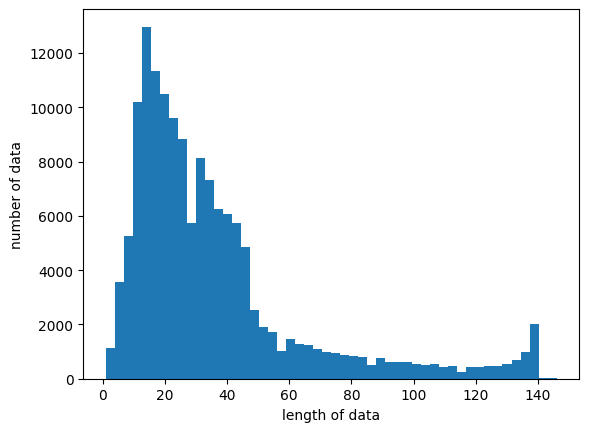

In [ ]:
from matplotlib import pyplot as plt

# 학습 리뷰 길이 조사
print('학습 문장 최대 길이: ', max(len(l) for l in train_data['document']))
print('학습 문장의 평균 길이 : ', sum(map(len, train_data['document']))/len(train_data['document']))

plt.hist([len(s) for s in train_data['document']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [ ]:
# Store the model we want to use
from transformers import AutoModel, AutoTokenizer, BertTokenizer
MODEL_NAME = 'bert-base-multilingual-cased'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
tokenized_train_sentences = tokenizer(
    list(train_data['document']),
    return_tensors='pt',
    padding=True,
    truncation=True,
    add_special_tokens=True,
)

In [ ]:
print(tokenized_train_sentences[0])
print(tokenized_train_sentences[0].tokens)
print(tokenized_train_sentences[0].ids)
print(tokenized_train_sentences[0].attention_mask)

Encoding(num_tokens=142, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', '아', '더', '##빙', '.', '.', '진', '##짜', '짜', '##증', '##나', '##네', '##요', '목', '##소', '##리', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD

In [ ]:
tokenized_test_sentences = tokenizer(
    list(test_data['document']),
    return_tensors='pt',
    padding=True,
    truncation=True,
    add_special_tokens=True,
)

In [ ]:
train_label = train_data['label'].values
test_label = test_data['label'].values

In [ ]:
print(train_label[0])

0


In [ ]:
class SingleSentDataset(torch.utils.data.Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

In [ ]:
train_dataset =SingleSentDataset(tokenized_train_sentences, train_label)
test_dataset =SingleSentDataset(tokenized_test_sentences, test_label)

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
# 문장 분류를 위해선 BERT 위에 classification을 위한 head를 부착해야 합니다.
# 해당 부분을 transformers에서는 라이브러리 하나만 호출하면 됩니다

In [ ]:
#!pip install accelerate -U

In [ ]:
#pip install transformers[torch]

In [ ]:
pip install --upgrade pip setuptools

In [ ]:
training_args = TrainingArguments(
    output_dir = './results', # output directory
    num_train_epochs=1, #total number of training epochs
    per_device_train_batch_size=32, #batch size per device during training
    per_device_eval_batch_size=64, #batch size for evaluation
    warmup_steps=500, #number of warmup steps for learning rate scheduler
    weight_decay=0.01, # strength of weight decay
    logging_dir='./logs', #directory for storing logs
    logging_steps =500,
    save_steps=500,
    save_total_limit=2
)

In [ ]:
model = BertForSequenceClassification.from_pretrained(MODEL_NAME)
model.to(device)

trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataset,
)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train() # 1epoch 당 30분

<ipython-input-22-4ddc9e724a62>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Step,Training Loss


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  precision, recall, f1, _ = precision_recall_fscore_support(labels, pred, average='binary')
  acc = accuracy_score(labels, preds)
  return {
      'accuracy' : acc,
      'f1' :f1,
      'precision' :precision,
      'recall' :recall
  }

In [ ]:
trainer=Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.evaluate(eval_dataset=test_dataset)

In [ ]:
# predict 함수
def sentences_predict(sent):
  model.eval()
  tokenized_sent = tokenizer(
      sent,
      return_tensors='pt',
      truncation=True,
      add_special_tokens=True,
      max_length=128
  )
  tokenized_sent.to(device)

  with torch.no_grad(): #그라디엔트 계산 비활성화
    outputs=model(
        input_ids=tokenized_sent['input_ids'],
        attention_mask=tokenized_sent['attention_mask'],
        toekn_type_uds=tokenized_sent['token_type_ids']
    )
  logits = outputs[0]
  logits = logits.detach().cpu().numpy()

In [ ]:
print(sentences_predict('영화 개재밌어 ㅋㅋㅋㅋ'))
print(sentences_predict('진짜 재미없네요 ㅋㅋ  '))
print(sentences_predict('너 때문에 진짜 짜증나'))
print(sentences_predict('정말 재밌고 좋았어요.'))

In [ ]:
# 위 코드 대신 pipeline 사용해도 됨
from transformers import pipeline

nlp_sentence_classif = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, device=0)

print(nlp_sentence_classif('영화 개재밌어 ㅋㅋㅋㅋ'))
print(nlp_sentence_classif('진짜 재미없네요 ㅋㅋ  ', model=model))
print(nlp_sentence_classif('너 때문에 진짜 짜증나', model=model))
print(nlp_sentence_classif('정말 재밌고 좋았어요.', model=model))

# BERT기반 두 문장 관계 분류

# 1.1 두 문장의 관계 분류

### 주어진 2개의 문장에 대해, 두 문장의 자연어 추론과 의미론적인 유사성을 측정하는 태스크 입니다.

#### 대표적으로 Natural Language Inference(NLI) 테스크가 존재합니다.

언어모델이 자연어의 맥락을 이해할 수 있는지 검증하는 태스크로서, 문장이 참인경우, 거짓인 경우, 알수 없는 경우로 나누어 집니다.

예를 들어서, 두문장이 있다고 가정해 보겠습니다.

전제문장: 너는 거기에 있을 필요 없어  
가설문장: 가도 돼  
이때, 전제문장과 가설문장의 내용이 유사함으로 가설문장을 참이라고 볼 수 있습니다.  

전제문장: 너는 거기에 있을 필요 업서  
가설문장: 넌 정확히 그 자리에 있어야 해  
이런 경우에는 내용이 모순되기 때문에, 가설문장을 거짓이라고 판단할 수 있습니다.  



#### 또 다른 태스크로는 Semantic Text Pair로 두 문장의 의미가 서로 같은 문장인지 검증하는 태스크입니다.

메일을 다 비울까 아니면 안읽은 것만 지울까?
안 읽은 메일함이랑 스팸 메일함이랑 비교했을 때 어디가 더 차있지?
두 문장이 의미적으로 유사하기 때문에 같다는 의미인 1로 데이터가 구성되어있습니다.

무협 소설 추천해주세요
판타지 소설 추천해주세요
두 문장이 유사한듯 보이지만, 무협과 판타지는 큰 차이가 있습니다.

따라서 다르다는 의미인 0으로 데이터가 구성됩니다.



# 1.2 Infromation Retrieval Question and Answering(IRQA)

챗봇에서 사용되는 태스크로 사전에 정의된 질문-대답(QA) 셋을 이용해 적절한 답변을 제공합니다.



그림과 같이 사용자가 "나이 알려줘"라는 질문을 했을때, 이를 우선 언어모델을 활용해 벡터로 변환을 합니다.

다음으로 가지고 있는 QA 셋에서 코사인 유사도같은 방법을 활용해 Top-N개의 유사한 질문 후보들을 선정합니다.

여기서 문제점은 항상 유사도가 가장 높은 것이 정답이 아닐 수 있다는 점입니다.

따라서 Paraphrase Detection모델을 통해 두 문장이 실제로 유사한지 안한지 판단하는 언어모델을 활용합니다.





In [ ]:
# 두 문장 관계 분류를 위한 학습 데이터 구축
# 목적 : paraphrasing 된 두 문장이 서로 같은 의미를 가지고 있는지 분류하는 것

In [ ]:
!git clone https://github.com/warnikchow/paraKQC.git

Cloning into 'paraKQC'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 51 (delta 14), reused 2 (delta 2), pack-reused 34
Receiving objects: 100% (51/51), 4.29 MiB | 19.28 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
data = open('/content/paraKQC_v1.txt')

In [ ]:
lines = data.readlines()

In [ ]:
for i in range(0,15):
      print(lines[i]) # 10개씩 paraphasing

0	0	메일을 다 비울까 아니면 안읽은 것만 지울까?

0	0	메일 중에 안읽은 것만 지울까? 다 지울까?

0	0	안읽은 메일만 지워 다지워?

0	0	다 지울까 안읽은 메일만 지울까?

0	0	전체를 비울까 안읽은 것만 비울까?

0	0	안읽은 메일만 지울꺼야? 아니면 다 지울꺼야?

0	0	어떻게 지울까? 안읽은거만? 전체 다?

0	0	메일을 다 지울지 안읽은거만 지울지 알려주세요

0	0	메일은 다 지울수도 있고, 안읽은거만 지울 수도 있어. 어떻게 할래?

0	0	안읽은 메일만 지우든가, 다 지울 수 있는데 어떻게 할꺼야?

0	0	지메일 쓸래, 네이버 메일 쓸래

0	0	지메일을 쓸거야 네이버 메일을 쓸꺼야?

0	0	지메일, 네이버 둘 중에 뭘 쓸래?

0	0	네이버랑 지메일이 있는데 뭘 쓸래?

0	0	네이버랑 지메일 중에 골라줄래?



In [ ]:
similar_sents = {}

In [ ]:
similar_sent = []
total_sent = []

for line in lines:
    line = line.strip()
    sent = line.split('\t')[2]
    total_sent.append(sent)
    similar_sent.append(sent)
    if len(similar_sent) == 10:
        similar_sents[similar_sent[0]] = similar_sent[1:]
        similar_sent = []


In [ ]:
print(len(total_sent)) # 가장 유사한 문장을 찾기 위한 전체 문장 pool

10000


In [ ]:
for i in range(0,15):
      print(total_sent[i])

메일을 다 비울까 아니면 안읽은 것만 지울까?
메일 중에 안읽은 것만 지울까? 다 지울까?
안읽은 메일만 지워 다지워?
다 지울까 안읽은 메일만 지울까?
전체를 비울까 안읽은 것만 비울까?
안읽은 메일만 지울꺼야? 아니면 다 지울꺼야?
어떻게 지울까? 안읽은거만? 전체 다?
메일을 다 지울지 안읽은거만 지울지 알려주세요
메일은 다 지울수도 있고, 안읽은거만 지울 수도 있어. 어떻게 할래?
안읽은 메일만 지우든가, 다 지울 수 있는데 어떻게 할꺼야?
지메일 쓸래, 네이버 메일 쓸래
지메일을 쓸거야 네이버 메일을 쓸꺼야?
지메일, 네이버 둘 중에 뭘 쓸래?
네이버랑 지메일이 있는데 뭘 쓸래?
네이버랑 지메일 중에 골라줄래?


In [ ]:
print(len(similar_sents))#10개씩 묶여있는 sentence가 몇개있는지

999


In [ ]:
for i, key in enumerate(similar_sents.keys()): #10개의 문장 중, 첫 번째 문장을 key
    print('\n', key) #나머지 9개의 문장을 value
    for sent in similar_sents[key]: # 헷갈리니까 이걸 similar_sents dict라고 정의
      print('-', sent)
    if i>3:
      break
  # 첫번째 문장 :key 값
  # 9개의 문장 : paraphasing 된 value 값
# key에 대해 paraphrasing 이 이루어진 문장 배열을 value로써 저장해둠


 메일을 다 비울까 아니면 안읽은 것만 지울까?
- 메일 중에 안읽은 것만 지울까? 다 지울까?
- 안읽은 메일만 지워 다지워?
- 다 지울까 안읽은 메일만 지울까?
- 전체를 비울까 안읽은 것만 비울까?
- 안읽은 메일만 지울꺼야? 아니면 다 지울꺼야?
- 어떻게 지울까? 안읽은거만? 전체 다?
- 메일을 다 지울지 안읽은거만 지울지 알려주세요
- 메일은 다 지울수도 있고, 안읽은거만 지울 수도 있어. 어떻게 할래?
- 안읽은 메일만 지우든가, 다 지울 수 있는데 어떻게 할꺼야?

 지메일 쓸래, 네이버 메일 쓸래
- 지메일을 쓸거야 네이버 메일을 쓸꺼야?
- 지메일, 네이버 둘 중에 뭘 쓸래?
- 네이버랑 지메일이 있는데 뭘 쓸래?
- 네이버랑 지메일 중에 골라줄래?
- 두 개 중에 골라줘 네이버랑 지메일.
- 네이버 아니면 지메일 중에 어떤 이메일 써야될까?
- 네이버 메일이랑 지메일 중에 어떤 걸 써?
- 지메일 쓸래? 아님 네이버?
- 메일을 써야하는데, 지메일이랑 네이버 중에 뭘 쓸래?

 지메일이랑 네이버 메일 중 파일 전송용량이 뭐가 더 크지?
- 지메일이랑 네이버 메일 중 뭐가 더 용량이 큰 파일을 보낼 수 있어?
- 파일 전송용량이 더 큰 쪽이 어디지? 지메일? 네이버 메일?
- 파일 전송용량이 지메일이 큰가? 네이버 메일이 큰가?
- 파일 전송용량이 지메일이랑 네이버 메일 중 뭐가 더 크지?
- 지메일의 파일 전송용량이랑 네이버 메일의 파일 전송용량 중에 뭐가 더 크지?
- 네이버 메일이랑 지메일 중에 어떤게 파일용량을 더 많이 전송할 수 있어?
- 파일 용량을 더 크게 보낼 수 있는 메일은 네이버야 지메일이야?
- 지메일과 네이버 메일을 비교했을 때, 파일 전송용량이 더 큰 게 뭐야?
- 네이버 메일이랑 지메일이랑 보낼 수 있는 파일용량이 뭐가 더 크지?

 네이트 메일이랑 한메일 중 어느 것이 먼저 서비스를 종료하지?
- 먼저 서비스를 종료하는 쪽이 어디야? 네이트 메일? 한메일?
- 어느 곳이 먼저 종료할까? 네이트 메일? 한메일?


In [ ]:
# 다음은 문장 유사도 자체는 높지만, 실제 그 의미가 다른 데이터들을 모아보겠음
!pip install transformers

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

MODEL_NAME = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)
model.to('cuda:0')

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
def get_cls_token(sent_A):
    model.eval()

    tokenized_sent = tokenizer(
            sent_A,
            return_tensors="pt",
            truncation=True,
            add_special_tokens=True,
            max_length=32
    ).to('cuda:0')

    with torch.no_grad():# 그라디엔트 계산 비활성화
        outputs = model(
            input_ids=tokenized_sent['input_ids'],
            attention_mask=tokenized_sent['attention_mask'],
            token_type_ids=tokenized_sent['token_type_ids']
            )
    logits = outputs.last_hidden_state[:,0,:].detach().cpu().numpy()

    return logits


In [ ]:
print(get_cls_token('이순신은 조선 중기의 무신이다.'))

In [ ]:
total_sent_vector = {}
for i, sent in enumerate(total_sent): # 전체 문장 pool을 전부 embedding
    total_sent_vector[sent] = get_cls_token(sent) #{key, vlaue} = {문장, vector}
    if i %500==0:
      print(i)


In [ ]:
import numpy as np

In [ ]:
def custom_cosine_similarity(a,b):
    numerator = np.dot(a,b.T)
    a_norm = np.sqrt(np.sum(a * a))
    b_norm = np.sqrt(np.sum(b * b, axis=-1))

    denominator = a_norm * b_norm
    return numerator/denominator

In [ ]:
non_similar_sents = {}

In [ ]:
for key in similar_sents.keys():    # similar_sents dict의 sentence를 가져옵니다.
    key_sent_vector = total_sent_vector[key] # 전체 문장 pool에서 해당 sent의 vector을 가져옴
    sentence_similarity = {}          #다음으로는 전체 문장 pool의 모든 vector와 비교하며

    for sent in total_sent:   # 가장 유사한 문장을 가져옴
        if sent not in similar_sents[key] and sent != key:
            sent_vector = total_sent_vector[sent]
            similarity = custom_cosine_similarity(key_sent_vector, sent_vector)
            sentence_similarity[sent] = similarity

    sorted_sim = sorted(sentence_similarity.items(), key=lambda x: x[1], reverse=True)
    non_similar_sents[key] = sorted_sim[0:10]   # similar_sents dict의 문장과 가장 유사한 10개의 문장

In [ ]:
for i, key in enumerate(non_similar_sents.keys()):
  print('\n', key)
  for sent in non_similar_sents[key]:
    print('-', sent)
  if i>3:
    break

In [ ]:
output = open('para_kqc_sim_data.txt', 'w', encoding='utf-8')

for i, key in enumerate(similar_sents.keys()):
    for sent in similar_sents[key]:
        output.write(key + '\t' + sent + '\t1\n')

for i, key in enumerate(non_similar_sents.keys()):
    for sent in non_similar_sents[key]:
        output.write(key + '\t' + sent[0] + '\t0\n')

output.close()

# 두 문장 관계 분류 실습

여기서부터 듣기

In [ ]:
import torch
import sys

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
import random

data = open('/content/para_kqc_sim_data.txt', 'r', encoding='utf-8')
lines = data.readlines()

# 데이터셋 구조 확인
random.shuffle(lines)

In [ ]:
train = {'sent_a':[], 'sent_b':[], 'label':[]}
test = {'sent_a':[], 'sent_b':[], 'label':[]}

for i, line in enumerate(lines):
    if i < len(lines) * 0.8: # 80% train
        line = line.strip()
        train['sent_a'].append(line.split('\t')[0])
        train['sent_b'].append(line.split('\t')[1])
        train['label'].append(int(line.split('\t')[2]))
    else:
        line = line.strip()
        test['sent_a'].append(line.split('\t')[0])
        test['sent_b'].append(line.split('\t')[1])
        test['label'].append(int(line.split('\t')[2]))


In [ ]:
import pandas as pd

train_data = pd.DataFrame({"sent_a":train['sent_a'], "sent_b":train['sent_b'], "label":train['label']})
test_data = pd.DataFrame({"sent_a":test['sent_a'], "sent_b":test['sent_b'], "label":test['label']})

# 데이터 중복을 제외한 갯수 확인
print('학습데이터 : ', train_data.groupby(['sent_a', 'sent_b']).ngroups, '라벨 : ', train_data['label'].nunique() )
print('테스트 데이터 : ', test_data.groupby(['sent_a', 'sent_b']).ngroups, '라벨 : ', test_data['label'].nunique() )

# 중복 데이터 제거
train_data.drop_duplicates(subset=['sent_a', 'sent_b'], inplace= True)
test_data.drop_duplicates(subset=['sent_a', 'sent_b'], inplace= True)

# 데이터셋 갯수 확인
print('중복 제거 후 학습 데이터셋 : {}'.format(len(train_data)))
print('중복 제거 후 테스트 데이터셋 : {}'.format(len(test_data)))


학습데이터 :  15171 라벨 :  2
테스트 데이터 :  3792 라벨 :  2
중복 제거 후 학습 데이터셋 : 15171
중복 제거 후 테스트 데이터셋 : 3792


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# null 데이터 제거
train_data.replace('', np.nan, inplace=True)
test_data.replace('', np.nan, inplace=True)

train_data = train_data.dropna(how='any')
test_data = test_data.dropna(how='any')

print('null 제거 후 학습 데이터셋 : {}'.format(len(train_data)))
print('null 제거 후 테스트 데이터셋 : {}'.format(len(test_data)))

null 제거 후 학습 데이터셋 : 15171
null 제거 후 테스트 데이터셋 : 3792


In [ ]:
print(train_data['sent_a'][0])
print(train_data['sent_b'][0])
print(train_data['label'][0]) #1:유사하다

조카 생일이 있는 주가 이번주랬냐, 다음주랬냐?
이번주에 조카 생일이 있나요, 다음주에 있나요?
1


학습 전체 문장의 최대 길이 :  49
전체 문장의 평균 길이 :  22.390284094654273


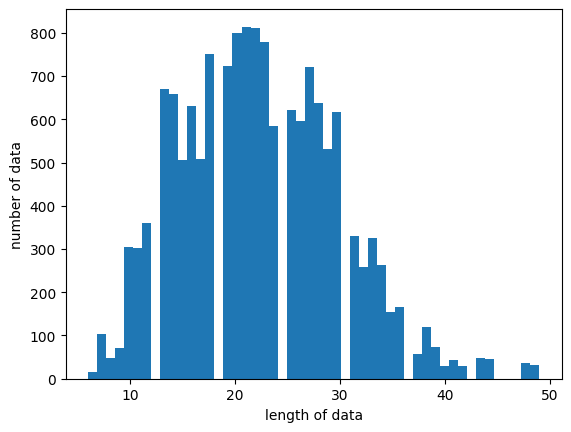

학습 가정 문장의 최대 길이 : 65
가정 문장의 평균 길이 :  25.55335838112188


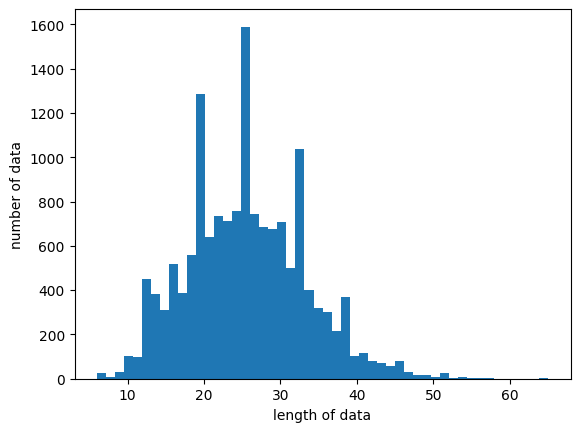

In [ ]:
# 학습 전체 문장 길이조사
print('학습 전체 문장의 최대 길이 : ',max(len(l) for l in train_data['sent_a']))
print('전체 문장의 평균 길이 : ', sum(map(len, train_data['sent_a']))/len(train_data['sent_a']))

plt.hist([len(s) for s in train_data['sent_a']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

# 학습 가정 묹아 길이조사
print('학습 가정 문장의 최대 길이 :',max(len(l) for l in train_data['sent_b']))
print('가정 문장의 평균 길이 : ', sum(map(len, train_data['sent_b']))/len(train_data['sent_b']))

plt.hist([len(s) for s in train_data['sent_b']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [ ]:
from transformers import AutoModel, AutoTokenizer, BertTokenizer

MODEL_NAME = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [ ]:
tokenized_train_sentences = tokenizer(
    list(train_data['sent_a'][0:]),
    list(train_data['sent_b'][0:]),
    return_tensors='pt',
    padding=True,
    truncation=True,
    add_special_tokens=True,
    max_length=64
)

In [ ]:
print(tokenized_train_sentences[0])
print(tokenized_train_sentences[0].tokens)
print(tokenized_train_sentences[0].ids)
print(tokenized_train_sentences[0].attention_mask)

Encoding(num_tokens=64, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', '조', '##카', '생', '##일', '##이', '있는', '주', '##가', '이', '##번', '##주', '##랬', '##냐', ',', '다음', '##주', '##랬', '##냐', '?', '[SEP]', '이', '##번', '##주', '##에', '조', '##카', '생', '##일', '##이', '있', '##나', '##요', ',', '다음', '##주', '##에', '있', '##나', '##요', '?', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
[101, 9678, 24206, 9420, 18392, 10739, 13767, 9689, 11287, 9638, 35465, 16323, 118860, 118728, 117, 52292, 16323, 118860, 118728, 136, 102, 9638, 35465, 16323, 10530, 9678, 24206, 9420, 18392, 10739, 9647, 16439, 48549, 117, 52292, 16323, 10530, 9647, 16439, 48549, 136, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
tokenized_test_sentences = tokenizer(
    list(test_data['sent_a'][0:]),
    list(test_data['sent_b'][0:]),
    return_tensors='pt',
    padding=True,
    truncation=True,
    add_special_tokens=True,
    max_length=64
)

In [ ]:
train_label = train_data['label'].values[0:]
test_label = test_data['label'].values[0:]

In [ ]:
print(train_label[0])

1


In [ ]:
class MultiSentDataset(torch.utils.data.Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

In [ ]:
train_dataset =MultiSentDataset(tokenized_train_sentences, train_label)
test_dataset =MultiSentDataset(tokenized_test_sentences, test_label)

In [ ]:
pip install --upgrade pip setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
from transformers import Trainer, TrainingArguments,  BertConfig


training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    logging_dir='./logs',            # directory for storing logs
    logging_steps=500,
    save_total_limit=2,
)


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [ ]:
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
model.parameters
model.to(device)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  precision, recall, f1, _ = precision_recall_fscore_support(labels, pred, average='binary')
  acc = accuracy_score(labels, preds)
  return {
      'accuracy' : acc,
      'f1' :f1,
      'precision' :precision,
      'recall' :recall
  }

In [ ]:
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)


In [ ]:
trainer.train()

In [ ]:
trainer.evaluate(eval_dataset=test_dataset)

In [ ]:
trainer.save_model('./results')

In [ ]:
def sentences_predict(sent_A, sent_B):
  model.eval()
  tokenized_sent = tokenizer(
      sent_A,
      sent_B,
      return_tensors='pt',
      truncation=True,
      add_special_tokens=True,
      max_length=64
  )
  tokenized_sent.to(device)

  with torch.no_grad(): #그라디엔트 계산 비활성화
    outputs=model(
        input_ids=tokenized_sent['input_ids'],
        attention_mask=tokenized_sent['attention_mask'],
        toekn_type_uds=tokenized_sent['token_type_ids']
    )
  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  result = np.argmax(logits)

  if result == 0:
    result = 'non_similar'
  elif result == 1:
    result = 'similar'
  return result

In [ ]:
print(sentences_predict('오늘 날씨가 어때요?','오늘의 날씨를 알려줘'))
print(sentences_predict('오늘 날씨가 어때요?','기분 진짜 안좋다.'))

In [ ]:
#챗봇 만들기
import pandas as pd

!git clone https://github.com/songys/Chatbot_data.git

data = pd.read_csv('/content/Chatbot_data/ChatbotData.csv')

In [ ]:
data.head()

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
MODEL_NAME = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)
model.to(device)

In [ ]:
chatbot_Question = data['Q'].values
chatbot_Answer = data['A'].values
print(chatbot_Question[0:3])
print(chatbot_Answer[0:3])

In [ ]:
# [CLS]token을 얻기 위한 함수
def get_cls_token(sent_A):
  model.eval()
  tokenized_sent = tokenizer(
      sent_A,
      return_tensors='pt',
      truncation=True,
      add_special_tokens=True,
      max_length=32
  ).to(device)
  with torch.o_grad():#그라디엔트 계산 비활성화
    outputs = model(
        input_ids = tokenized_sent['input_ids'],
        attention_mask = tokenized_sent['attention_mask'],
        token_type_ids = tokenized_sent['token_type_ids']
    )
  logits = outputs.last_hidden_state[:0,:].detach().cpu().numpy()
  return logits

In [ ]:
# 전체 질문에 대한 vector 정보를 저장
chatbot_Question_vectors = {}
for i, question in enumerate(chatbot_Question):
    chatbot_Question_vectors[i] = get_cls_token(question)

In [ ]:
#전체 질문과 유사도를 검사해서 top-n개를 반환하는 코드
import numpy as np

def custom_cosine_similarity(a,b):
    numerator = np.dot(a,b.T)
    a_norm = np.sqrt(np.sum(a * a))
    b_norm = np.sqrt(np.sum(b * b, axis=-1))

    denominator = a_norm * b_norm
    return numerator/denominator

In [ ]:
def return_top_n_idx(question, n):
    question_vector = get_cls_token(question)
    sentence_similarity = {}
    for i in chatbot_Question_vectors.keys():
        ir_vector = chatbot_Question_vectors[i]
        similarity = custom_cosine_similarity(question_vector, ir_vector)
        sentence_similarity[i] = similarity

    sorted_sim = sorted(sentence_similarity.items(), key=lambda x: x[1], reverse=True)
    return sorted_sim[0:n]

In [ ]:
print(return_top_n_idx('오늘 너무 힘들어', 5)) #top 5개 question id를 반환

In [ ]:
print('most similar questions')
for result in return_top_n_idx('오늘 너무 힘들어', 5):
  print(chatbot_Question[result[0]])
print('\nmost similar answers')
for result in return_top_n_idx('오늘 너무 힘들어', 5):
  print(chatbot_Answer[result[0]])

In [ ]:
# 하지만 top-1의 결과가 정답이 아닌 경우도 있음
print('most similar questions')
for result in return_top_n_idx('너 이름이 뭐야?', 5):
  print(chatbot_Question[result[0]])
print('\nmost similar answers')
for result in return_top_n_idx('너 이름이 뭐야?', 5):
  print(chatbot_Answer[result[0]])

In [ ]:
# 이진 분류 모델
# 먼저 앞서서 학습한 문장 분류 모델을 load

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from transformers import BertForSequenceClassification


MODEL_NAME = "/content/drive/MyDrive/P_KLUE/baseline_model/bert_two_sent_classifier"
classifier_model = BertForSequenceClassification.from_pretrained(MODEL_NAME)
classifier_model.to(device)

In [ ]:
# predict함수
# 0:'non_similar', 1:'similar'
def sentences_predict(sent_A, sent_B):
    classifier_model.eval()
    tokenized_sent = tokenizer(
            sent_A,
            sent_B,
            return_tensors="pt",
            truncation=True,
            add_special_tokens=True,
            max_length=64
    )

    tokenized_sent.to('cuda:0')

    with torch.no_grad():# 그라디엔트 계산 비활성화
        outputs = classifier_model(
            input_ids=tokenized_sent['input_ids'],
            attention_mask=tokenized_sent['attention_mask'],
            token_type_ids=tokenized_sent['token_type_ids']
            )

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits)

    # if result == 0:
    #   result = 'non_similar'
    # elif result == 1:
    #   result = 'similar'
    return result


In [ ]:
print(sentences_predict('오늘 날씨가 어때요?','오늘의 날씨를 알려줘'))
print(sentences_predict('오늘 날씨가 어때요?','기분 진짜 안좋다.'))

In [ ]:
# top_n개의 문장을 입력으로 받으면 가장 적절한 문장을 반환하는 함수
def get_answer(question, n):
    results = return_top_n_idx(question, n) # top n개를 list로 받고
    for result in results: #n개를 반복문을 돌면서
        ir_answer = chatbot_Answer[result[0]]
        ir_question = chatbot_Question[result[0]]
        if sentences_predict(question, ir_question) == 1:
            return ir_answe # 정답 반환
    return chatbot_Answer[results[0][0]]

In [ ]:
print(get_answer('너 이름이 뭐야?',5))

In [ ]:
print(get_answer('나 지금 너무 우울해',5))

# BERT 기반 문장 토큰 분류 (실습 포함)

## 1.1 문장 토큰 관계 분류 task
- 주어진 문장의 각 token이 어떤 범주에 속하는지 분류하는 task

##1.2 Named Entity Recognition(NER) 태스크가 있습니다.

NER은 문맥을 파악해, 인명, 기관명, 지명 등과 같은 특정한 의미를 가지고 있는 단어 또는 개체를 인식하는 태스크입니다.

조지 워싱턴은 워싱턴에 살고 있다.
위와 같은 문장에서 워싱턴은 사람이고, 워싱턴은 지역을 의미합니다.

두 워싱턴을 구분하기 위해서는 문맥을 파악해야한 합니다.

##1.3 Part-of-speech Tagging (POS tagging) 입니다.

POS tagging은 토큰의 품사를 분류하는 태스크 입니다.

품사란 단어를 문법적 공통성에 따라 언어학자들이 나누어 놓은 것을 의미합니다.

간단하게 동사, 고유명사, 일반명사, 형용사 등 이런 것들이 있겠지요!

## 1.4 kor_ner은 한국해양대학교 자연어 처리 연구실에서 공개한  데이터 셋입니다. ()

NER 라벨 뿐만이 아니라 POS tagging을 위한 라벨도 같이 존재합니다.

해당 데이터 같은 경우에는 B, I, O 태그로 구성이 되어있습니다.

B는 begin, I는 in, O는 의미없음을 의미합니다.

예를들어, "그러나 이달 초 트럼프 대통령의 사직서 제출 요구를 거부하고 맞섰다가 해고당했다." 는 문장은 다음과 같이 태깅이 되어있습니다.

그러나 / O
이달  / O
초 / O
트럼프 / B-PER
대통령 / O
의 / O
사직서 / O
제출 / O
...


In [ ]:
# 문장 토큰 분류 모델 학습 실습

In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
#torch.cuda.get_device_name(0)

In [ ]:
!git clone https://github.com/kmounlp/NER.git

fatal: destination path 'NER' already exists and is not an empty directory.


In [ ]:
import os
import glob

file_list = []

for x in os.walk('/content/NER/'):
      for y in glob.glob(os.path.join(x[0], '*_NER.txt')):
            file_list.append(y)

file_list = sorted(file_list)

In [ ]:
for file_path in file_list:
  print(file_path)

/content/NER/말뭉치 - 형태소_개체명/00002_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00003_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00004_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00005_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00006_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00007_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00008_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00009_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00010_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00011_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00012_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00013_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00014_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00015_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00016_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00017_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00018_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00019_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00020_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00021_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00022_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00023_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00024_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00025_NER.txt
/content/NER/말뭉치

In [ ]:
!pip install transformers

In [ ]:
# 데이터셋 샘플
from pathlib import Path

file_path = file_list[0]
file_path = Path(file_path)
raw_text = file_path.read_text().strip()

print(raw_text[0:1000])

## 1
## 오에 겐자부로는 일본 현대문학의 초석을 놓은 것으로 평가받는 작가 나쓰메 소세키(1867~1916)의 대표작 ‘마음’에 담긴 군국주의적 요소, 야스쿠니 신사 참배 행위까지 소설의 삽화로 동원하며 일본 사회의 ‘비정상성’을 문제 삼는다.
## <오에 겐자부로:PER>는 <일본:LOC> 현대문학의 초석을 놓은 것으로 평가받는 작가 <나쓰메 소세키:PER>(<1867~1916:DUR>)의 대표작 ‘<마음:POH>’에 담긴 군국주의적 요소, <야스쿠니 신사:ORG> 참배 행위까지 소설의 삽화로 동원하며 <일본:ORG> 사회의 ‘비정상성’을 문제 삼는다.
오에	오에	NNG	B-PER
_	_	_	I-PER
겐자부로	겐자부로	NNP	I-PER
는	는	JX	O
_	_	_	O
일본	일본	NNP	B-LOC
_	_	_	O
현대	현대	NNG	O
문학	문학	NNG	O
의	의	JKG	O
_	_	_	O
초석	초석	NNG	O
을	을	JKO	O
_	_	_	O
놓	놓	VV	O
은	은	ETM	O
_	_	_	O
것	것	NNB	O
으로	으로	JKB	O
_	_	_	O
평가	평가	NNG	O
받	받	VV	O
는	는	ETM	O
_	_	_	O
작가	작가	NNG	O
_	_	_	O
나쓰메	나쓰메	NNP	B-PER
_	_	_	I-PER
소세키	소세키	NNP	I-PER
(	(	SS	O
1867	1867	SN	B-DUR
~	~	SO	I-DUR
1916	1916	SN	I-DUR
)	)	SS	O
의	의	JKG	O
_	_	_	O
대표작	대표작	NNG	O
_	_	_	O
‘	‘	SS	O
마음	마음	NNG	B-POH
’	’	SS	O
에	에	JKB	O
_	_	_	O
담긴	담기+ㄴ	VV+ETM	O
_	_	_	O
군국주의	군국주의	NNG	O
적	적	XSN	O
_	_	_	O
요소	요소	NNG	O
,	,	SP	O
_	_	_	O
야스쿠니	야스쿠니	NNP	B-ORG
_	_	_	I-ORG
신사	신사	NNG	I-ORG
_	_	_	O
참배	참배	NNG	O
_	_	_	O
행위	행위	NNG	O
까지	까지	JX	O
_	_	_	O
소설

In [ ]:
import re

In [ ]:
def read_file(file_list):
  token_docs = []
  tag_docs = []
  for file_path in file_list :
    #print('read file from',file_path)
    file_path = Path(file_path)
    raw_text = file_path.read_text().strip()
    raw_docs = re.split(r'\n\t?\n', raw_text)
    for doc in raw_docs:
      tokens = []
      tags = []
      for line in doc.split('\n'):
        if line[0:1] == '$' or line[0:1]== ';' or line[0:2] == '##':
          continue
        try:
          token = line.split('\t')[0]
          tag = line.split('\t')[3] # 2:pos. 3:ner
          for i, syllable in enumerate(token): # 음절 단위로 잘라서
            tokens.append(syllable)
            modi_tag = tag
            if i>0:
              if tag[0] == 'B':
                modi_tag = 'I' + tag[1:] # BIO tag를 부착
            tags.append(modi_tag)
        except:
          print(line)
      token_docs.append(tokens)
      tag_docs.append(tags)
  return token_docs, tag_docs

In [ ]:
texts, tags = read_file(file_list[:])

In [ ]:
print(len(texts))
print(len(tags))

19263
19263


In [ ]:
print(texts[0], end='\n\n') #음절단위로 잘 자림
print(tags[0])

['오', '에', '_', '겐', '자', '부', '로', '는', '_', '일', '본', '_', '현', '대', '문', '학', '의', '_', '초', '석', '을', '_', '놓', '은', '_', '것', '으', '로', '_', '평', '가', '받', '는', '_', '작', '가', '_', '나', '쓰', '메', '_', '소', '세', '키', '(', '1', '8', '6', '7', '~', '1', '9', '1', '6', ')', '의', '_', '대', '표', '작', '_', '‘', '마', '음', '’', '에', '_', '담', '긴', '_', '군', '국', '주', '의', '적', '_', '요', '소', ',', '_', '야', '스', '쿠', '니', '_', '신', '사', '_', '참', '배', '_', '행', '위', '까', '지', '_', '소', '설', '의', '_', '삽', '화', '로', '_', '동', '원', '하', '며', '_', '일', '본', '_', '사', '회', '의', '_', '‘', '비', '정', '상', '성', '’', '을', '_', '문', '제', '_', '삼', '는', '다', '.']

['B-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'O', 'O', 'B-LOC', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'O', 'B-DUR', 'I-DUR', 'I-DUR', 'I-DUR', 'I-DUR', 'I-DUR',

In [ ]:
unique_tags = set(tag for doc in tags for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
id2tag = {id: tag for tag, id in tag2id.items()}

In [ ]:
for i, tag in enumerate(unique_tags):
  print(tag) # 학습을 위한 label list를 확인

O
B-DUR
B-ORG
I-PER
B-DAT
I-PNT
I-MNY
B-LOC
I-NOH
I-DAT
B-POH
I-POH
B-MNY
I-TIM
I-DUR
B-PNT
B-PER
I-ORG
I-LOC
B-NOH
B-TIM


In [ ]:
# EDA
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
texts_len = [len(x) for x in texts]

Text(0, 0.5, 'Probability')

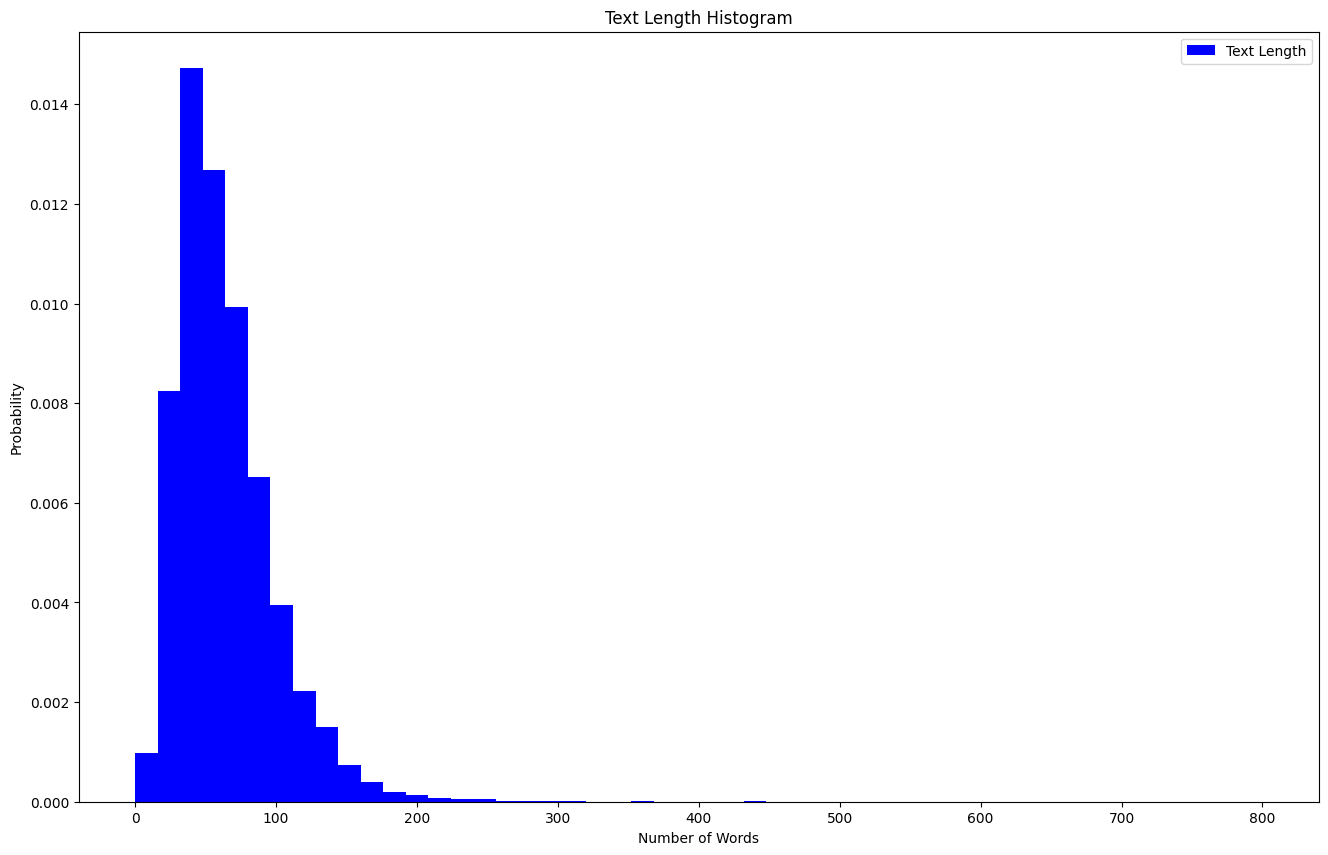

In [ ]:
# 문장의 길이의 히스토그램
plt.figure(figsize=(16,10))
plt.hist(texts_len, bins=50, range=[0,800], facecolor='b', density=True, label='Text Length')
plt.title('Text Length Histogram')
plt.legend()
plt.xlabel('Number of Words')
plt.ylabel('Probability')

In [ ]:
# 각 NER 태그별 데이터에 포함된 갯수
for tag in list(tag2id.keys()):
  globals()[tag] = 0

In [ ]:
for tag in tags:
  for enr in tag:
    globals()[ner] += 1

NameError: name 'ner' is not defined

In [ ]:
for tag in list(tag2id.keys()):
  print('{:>6} : {:>7,}'.format(tag, globals()[tag]))

     O :       0
 B-DUR :       0
 B-ORG :       0
 I-PER :       0
 B-DAT :       0
 I-PNT :       0
 I-MNY :       0
 B-LOC :       0
 I-NOH :       0
 I-DAT :       0
 B-POH :       0
 I-POH :       0
 B-MNY :       0
 I-TIM :       0
 I-DUR :       0
 B-PNT :       0
 B-PER :       0
 I-ORG :       0
 I-LOC :       0
 B-NOH :       0
 B-TIM :       0


In [ ]:
# Train Test Split
from sklearn.odel_selection import train_test_split
train_texts, test_texts, train_tags, test_tags = train_test_split(texts, tags, test_size=.2)

In [ ]:
print('Train 문장 : {:>6,}'.format(len(train_texts)))
print('Train 태그 : {:>6,}'.format(len(train_tags)))
print('Test 문장 : {:>6,}'.format(len(test_texts)))
print('Test 문장 : {:>6,}'.format(len(test_tags)))

In [ ]:
# BERT 토그나이저
from transformers import AutoModel, AutoTokenizer, BertTokenizer

MODEL_NAME = 'bert-base-multilingual-cased'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
pad_token_id = tokenizer.pad_token_id # 0
cls_token_id = tokenizer.cls_token_id # 101
sep_toekn_id = tokenizer.sep_token_id # 102
pad_token_label_id = tag2id['O']
cls_token_label_id = tag2id['O']
sep_token_label_id = tag2id['O']

In [ ]:
# 기존 토크나이저는 wordPiece tokenizerfh tokenizing결과를 반환
# 데디터 단위를 음절 단위로 변경했기 때문에, tokenizer도 음절 tokenizer로 바꿈

def ner_tokenizer(sent, max_seq_length):
      pre_syllable = "_"
      input_ids = [pad_token_id] * (max_seq_length - 1)
      attention_mask = [0] * (max_seq_length - 1)
      token_type_ids = [0] * max_seq_length
      sent = sent[:max_seq_length-2]

      for i, syllable in enumerate(sent): # 문자 한개씩
            if syllable == '_':
                  pre_syllable = syllable
            if pre_syllable != "_":
                  syllable = '##' + syllable # 중간 음절에는 모두 prefix를 붙입니다.
                  # 이순신은 조선 -> [이, ##순, ##신, ##은, 조, ##선]
           pre_syllable = syllable

           input_ids[i] = (tokenizer.convert_tokens_to_ids(syllable))
           attention_mask[i] = 1

      input_ids = [cls_token_id] + input_ids
      input_ids[len(sent)+1] = sep_token_id
      attention_mask = [1] + attention_mask
      attention_mask[len(sent)+1] = 1

      return {"input_ids": input_ids,
                 "attention_mask": attention_mask,
                 "token_type_ids": token_type_ids}

In [ ]:
print(ner_tokenizer(train_texts[0], 5))

In [ ]:
tokenized_train_sentences = []
tokenized_test_sentences = []
for text in train_texts: # 전체 데이터를 tokenizing 함
  tokenized_train_sentences.append(ner_tokenizer(text, 128))
for text in test_texts:
  tokenized_test_sentences.append(ner_tokenizer(text, 128))

In [ ]:
def encode_tags(tags, max_seq_length):
  # label 역시 입력 token과 개수를 맞춰줌
  tags = tags[:max_seq_length-2]
  labels = [tag2id[tag] for tag in tags]
  labels = [tag2id['O']] + labels

  padding_length = max_seq_length - len(labels)
  labels = labels + ([pad_token_label_id] * padding_length)

  return labels

In [ ]:
encode_tags(train_tags[0], 5)

In [ ]:
train_labels = []
test_labels = []
for tag in train_tags:
  train_labels.append(encode_tags(tag,128))
for tag in test_tags:
  test_labels.append(encode_tags(tag,128))

In [ ]:
len(train_labels), len(test_labels)

In [ ]:
# Token 데이터셋
class TokenDataset(torch.utils.data.Dataset):
      def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

      def __getitem__(self, idx):
            item = {key: torch.tensor(val) for key, val in self.encodings[idx].items()}
            item['labels'] = torch.tensor(self.labels[idx])
            return item

      def __len__(self):
            return len(self.labels)

train_dataset = TokenDataset(tokenized_train_sentences, train_labels)
test_dataset = TokenDataset(tokenized_test_sentences, test_labels)

In [ ]:
from transformers import BertForTokenClassificaiton, Trainer, TrainingArguments
import sys


In [ ]:
training_args = TrainingArguments(
      output_dir='./results', # output directory
      num_train_epochs=5, # total number of training epochs
      per_device_train_batch_size=8, # batch size per device during training
      per_device_eval_batch_size=64, # batch size for evaluation
      logging_dir='./logs', # directory for storing logs
      logging_steps=100,
      learning_rate=3e-5,
      save_total_limit=5
)

In [ ]:
#10.BertForTokenClassification

In [ ]:
model = BertForTokenClassification.from_pretrained(MODEL_NAME, num_labels=len(unique_tags))
model.to(device)

trainer = Trainer(
      model=model, # the instantiated 🤗 Transformers model to be trained
      args=training_args, # training arguments, defined above
      train_dataset=train_dataset, # training dataset
      eval_dataset=test_dataset # evaluation dataset
)

trainer.train() #1epoch 당 5min

In [ ]:
#11 New Data Inference
def ner_inference(text):
  model.eval()
  text = text.replace(' ','_')

  predictions, true_labels = [],[]

  tokenized_sent = ner_tokenizer(text, len(text)+2)
  input_ids = torch.tensor(tokenized_sent['input_ids']).unsqueeze(0).to(device)
  attention_mask = torch.tensor(tokenized_sent['attention_mask']).unsqueeze(0).to(device)
  token_type_ids = torch.tensor(tokenized_sent['token_type_ids']).unsqueeze(0).to(device)

  with torchno_grad():
    outputs = model(
        input_ids = input_ids,
        attention_mask = attention_mask,
        token_type_ids = token_type_ids
    )
  logits = outputs['logits']
  logits = logits.detach().cpu().numpy()
  label_ids = token_type_ids.cpu().numpy()

  predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
  true_labels.append(label_ids)

  pre_tags = [list(tag2id.keys())[p_i] for p in predictions for p_i in p]

  print('{}\t{}'.format('TOKEN', 'TAG'))
  print('=============')
  for i, tag in enumerate(pred_tags):
    print('{:^5}\t{:^5}'.format(tokenizer.conver_ids_to_tokens(tokenized_sent['input_ids'][i],)))

In [ ]:
text = '이순신은 조선 중기의 무신이다.'

In [ ]:
ner_inference(text)

In [ ]:
# 기계독해 모델 학습 실습

In [ ]:
!mkdir dataset

In [ ]:
!wget https://korquad.github.io/dataset/KorQuAD_v1.0_train.json
!wget https://korquad.github.io/dataset/KorQuAD_v1.0_dev.json

In [ ]:
!mv /content/KorQuAD_v1.0_train.json dataset
!mv /content/KorQuAD_v1.0_dev.json dataset

In [ ]:
import json
from pathlib import Path

In [ ]:
def read_squad(path):
      path = Path(path)
      with open(path, 'rb') as f:
            squad_dict = json.load(f)

      contexts = []
      questions = []
      answers = []
      for group in squad_dict['data']:
            for passage in group['paragraphs']:
                  context = passage['context']
                  for qa in passage['qas']:
                        question = qa['question']
                        for answer in qa['answers']:
                              contexts.append(context)
                              questions.append(question)
                              answers.append(answer)

      return contexts, questions, answers

train_contexts, train_questions, train_answers = read_squad('dataset/KorQuAD_v1.0_train.json')
val_contexts, val_questions, val_answers = read_squad('dataset/KorQuAD_v1.0_dev.json')

In [ ]:
print(train_contexts[52471])
print(len(train_contexts[52471]))

In [ ]:
print(train_questions[52471])

In [ ]:
print(train-answers[52471]) # 본문 내에서 정답이 시작되는 음절 순서가 'answer start'에 저장되어 있음

In [ ]:
def add_end_idx(answers, contexts):
      for answer, context in zip(answers, contexts):
        # 모델 학습을 위해 정답 데이터를 만들겠다
        # 정답 데이터는 start음절과 end음절로 구성되어 있음
        # 모델은 전체 토큰 중에서 start token과 end token을 찾는것을 목적
            gold_text = answer['text']
            start_idx = answer['answer_start']
            end_idx = start_idx + len(gold_text)

      # sometimes squad answers are off by a character or two – fix this
      # 실제 본문에서 해당 음절 번호로 잘라냈을 때, 정답과 같은지 검사해서 start, end를 보정합니다 :-)
      # '이순신은 조선 중기의 무신이다' -> '이순신' -> start: 0, end: 4
      if context[start_idx:end_idx] == gold_text:
            answer['answer_end'] = end_idx
      elif context[start_idx-1:end_idx-1] == gold_text:
            answer['answer_start'] = start_idx - 1
            answer['answer_end'] = end_idx - 1 # When the gold label is off by one character
      elif context[start_idx-2:end_idx-2] == gold_text:
            answer['answer_start'] = start_idx - 2
            answer['answer_end'] = end_idx - 2 # When the gold label is off by two characters

      return answers

train_answers = add_end_idx(train_answers, train_contexts)
val_answers = add_end_idx(val_answers, val_contexts)


In [ ]:
MODEL_NAME = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

train_encodings = tokenizer(train_contexts, train_questions, truncation=True, padding=True)
val_encodings = tokenizer(val_contexts, val_questions, truncation=True, padding=True)

In [ ]:
def add_token_positions(encodings, answers):
      start_positions = []
      end_positions = []

      for i in range(len(answers)):

            start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
            end_positions.append(encodings.char_to_token(i, answers[i]['answer_end']))

            # 아래 부분은 truncation을 위한 과정입니다.
            if start_positions[-1] is None:
                  start_positions[-1] = tokenizer.model_max_length

            if end_positions[-1] is None:
                  end_positions[-1] = encodings.char_to_token(i, answers[i]['answer_end'] + 1)

            # 추가된 예외 처리, 예를들어서 tokenizer와 model input의 max_length가 512인데,
            # start와 end position이 600과 610 이면 둘다 max_length로 변경해야함.
            if start_positions[-1] is None or start_positions[-1] > tokenizer.model_max_length:
                  start_positions[-1] = tokenizer.model_max_length

            if end_positions[-1] is None or end_positions[-1] > tokenizer.model_max_length:
                  end_positions[-1] = tokenizer.model_max_length

            encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

            return encodings

train_encodings = add_token_positions(train_encodings, train_answers)
val_encodings = add_token_positions(val_encodings, val_answers)


In [ ]:
class SquadDataset(torch.utils.data.Dataset):
      def __init__(self, encodings):
            self.encodings = encodings


      def __getitem__(self, idx):
            return {key: torch.tensor(vla[idx]) for key, val in self.encodings.items()}

      def __len__(self):
            return len(self.encodings.input_ids)

train_dataset = SquadDataset(train_encodings)
test_dataset = SquadDataset(val_encodings)

In [ ]:
from transformers import BertForQuestionAnswering

model = BertForQuestionAnswering.from_pretrained(MODEL_NAME)

In [ ]:
training_args = TrainingArguments(
      output_dir='./results', # output directory
      num_train_epochs=1, # total number of training epochs
      per_device_train_batch_size=8, # batch size per device during training
      per_device_eval_batch_size=64, # batch size for evaluation
      logging_dir='./logs', # directory for storing logs
      logging_steps=100,
      learning_rate=3e-5,
      save_total_limit=5
)

In [ ]:
model = BertForQuestionAnswering.from_pretrained(MODEL_NAME)
model.to(device)

trainer = Trainer(
      model=model, # the instantiated 🤗 Transformers model to be trained
      args=training_args, # training arguments, defined above
      train_dataset=train_dataset, # training dataset
      eval_dataset=test_dataset # evaluation dataset
)

trainer.train()#1epco 1hour

In [ ]:
trainer.save_model('.')

In [ ]:
from transformers import pipeline

In [ ]:
nlp = pipeline("question-answering", model=model, tokenizer=tokenizer, device=0)

In [ ]:
context = r"""
이순신(李舜臣, 1545년 4월 28일 ~ 1598년 12월 16일 (음력 11월 19일))은 조선 중기의 무신이었다.
본관은 덕수(德水), 자는 여해(汝諧), 시호는 충무(忠武)였으며, 한성 출신이었다.
문반 가문 출신으로 1576년(선조 9년) 무과(武科)에 급제하여 그 관직이 동구비보 권관, 훈련원 봉사, 발포진 수군만호, 조산보 만호, 전라좌도 수군절도사를 거쳐 정헌대부 삼도수군통제사에 이르렀다.
"""

print(nlp(question="이순신이 태어난 날짜는?", context=context))
print(nlp(question="이순신의 본관은?", context=context))
print(nlp(question="이순신의 시호는?", context=context))
print(nlp(question="이순신의 고향은?", context=context))
print(nlp(question="이순신의 마지막 직책은?", context=context))